In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Defining the Problem

**Objective:** Build a model to understand which factors influence credit card balance and check the relationship with other variables using `Multilinear Model`.

**Target Variable (Dependent):** `Balance`
**Predictors (Independent Variables):** `Limit, Rating, Income, Age, Cards, Education, Own, Student, Married, and Region`.

In [5]:
import pandas as pd


file_id = '1Ga7Q25CTCR7EFYmdlR2JEr6m6ptcS_sk'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Load the CSV
credit_df = pd.read_csv(download_url)

In [6]:
print(credit_df.info())  # Get data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB
None


In [7]:
print(credit_df.describe())  # Summary statistics for numerical columns

           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

        Education      Balance  
count  400.000000   400.000000  
mean    13.450000   520.015000  
std      3.125207   459.758877  
min      5.000000     0.000000  
25%     11.000000    68.750000  
50%     14.000000   459.500000  
75%     16.000000   863.000000  
max     20.000000  1999.000000  


In [8]:
print(credit_df.isnull().sum())  # Check for missing values

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64


In [9]:
# Checking for duplicate data if any
duplicates = credit_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


### Data understanding (EDA)

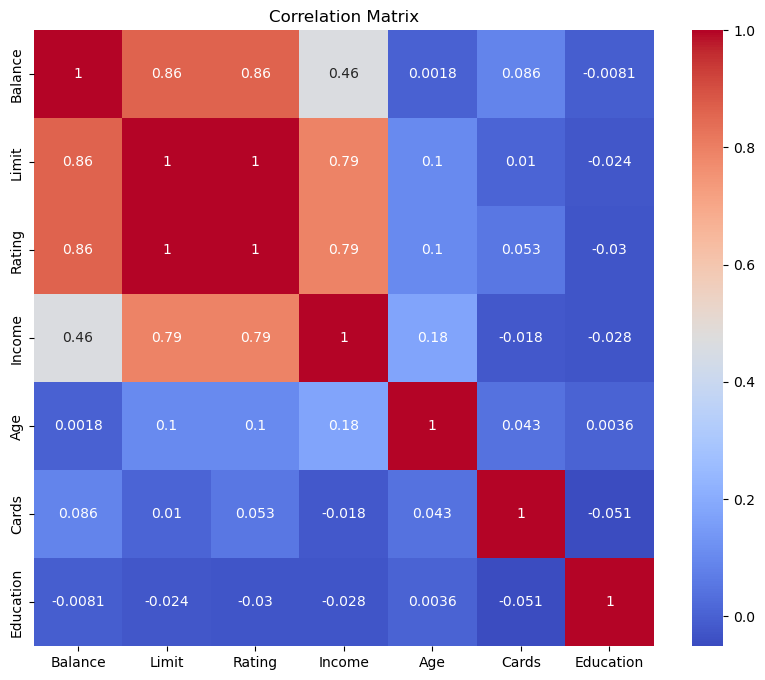

In [10]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(credit_df[['Balance', 'Limit', 'Rating', 'Income', 'Age', 'Cards', 'Education']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

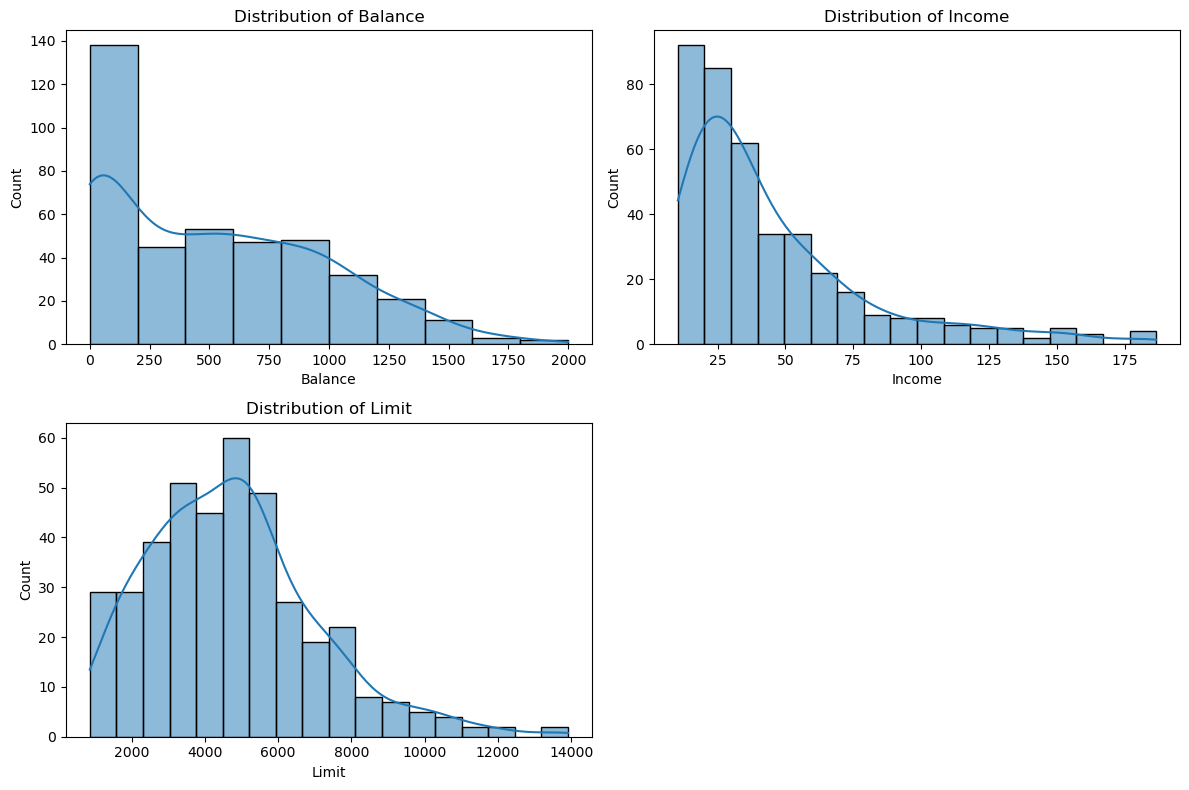

In [11]:
# Distribution of key variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Balance', 'Income', 'Limit']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(credit_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

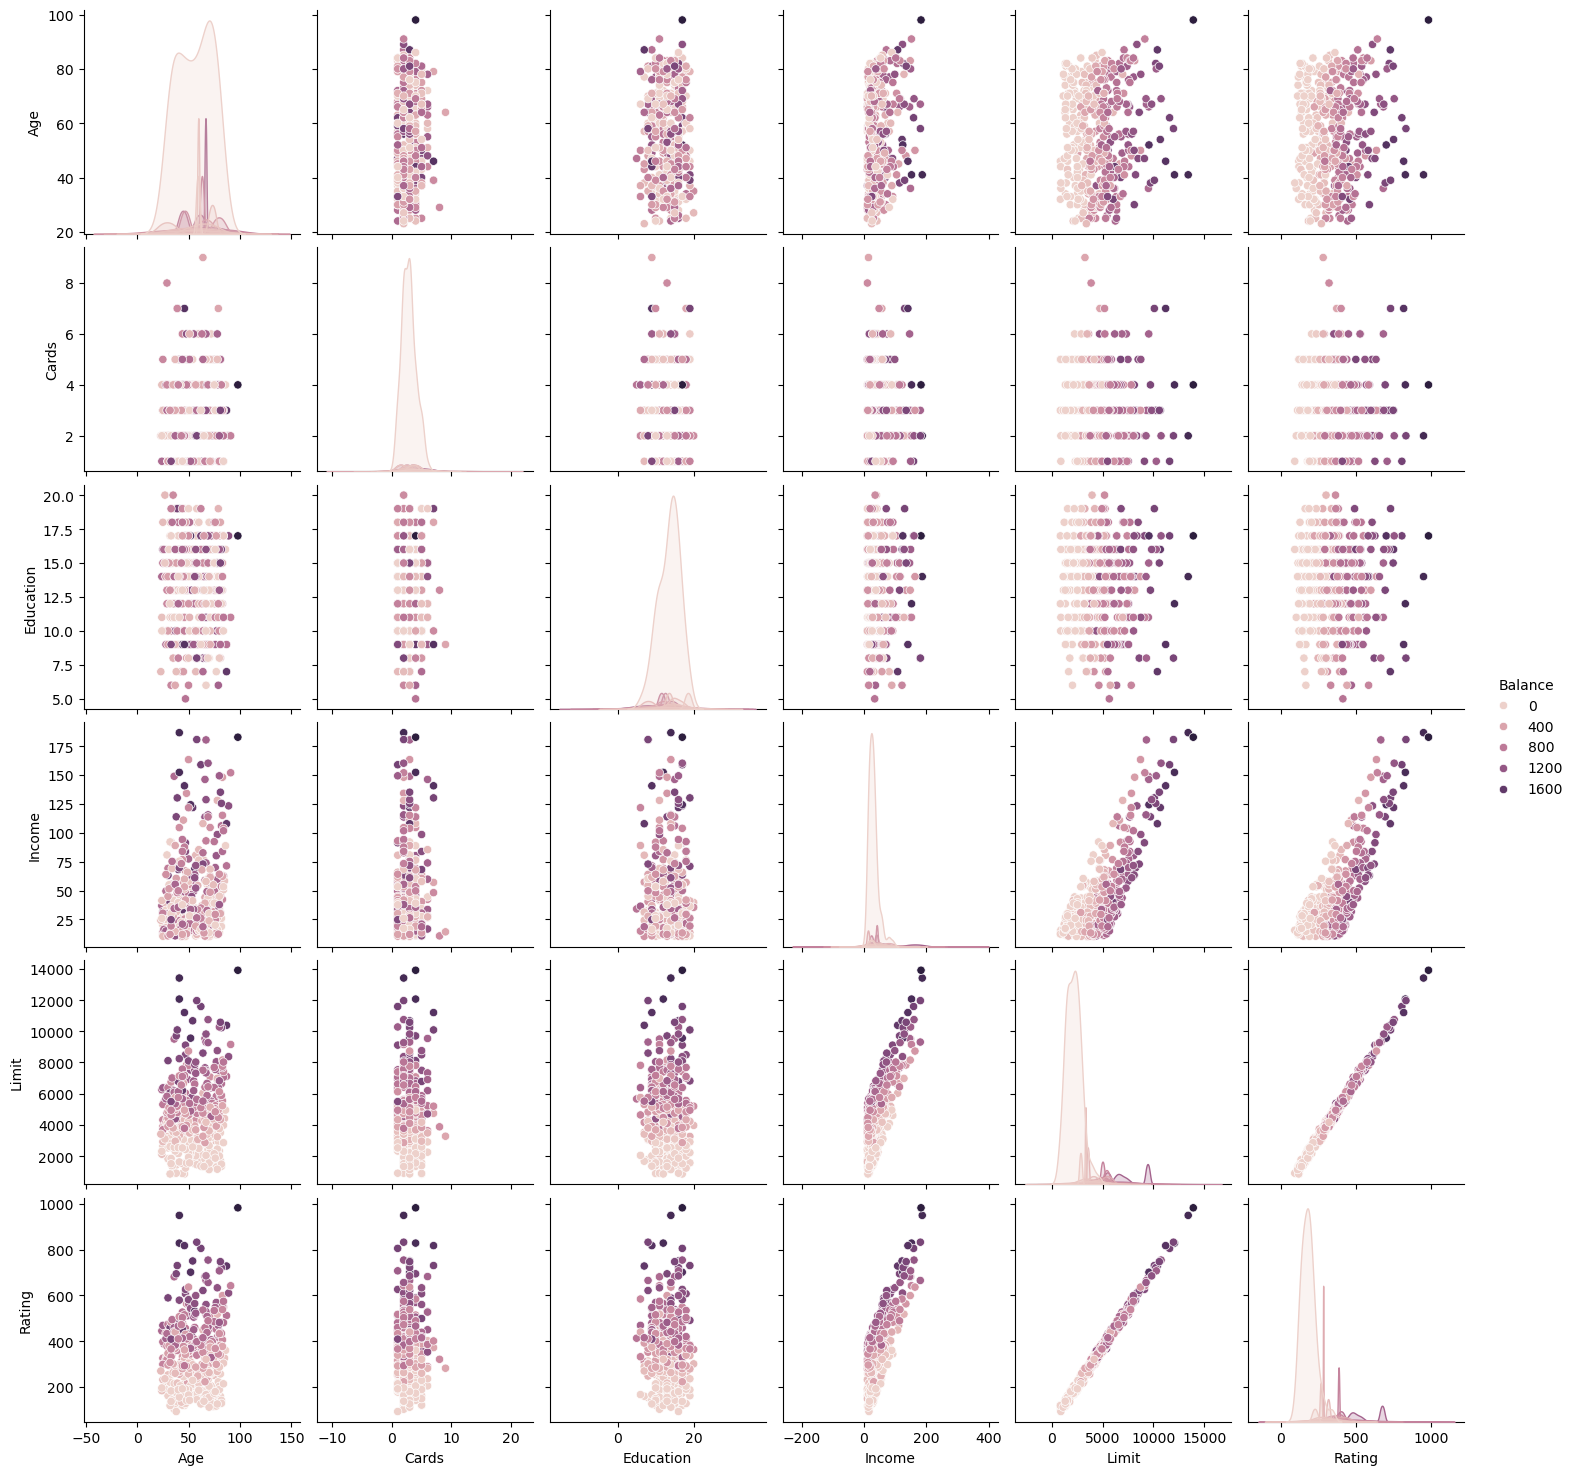

In [12]:
#Pairplot to visualize semantic mapping by using column Cards 
sns.pairplot(credit_df[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']],hue= "Balance")
plt.show()

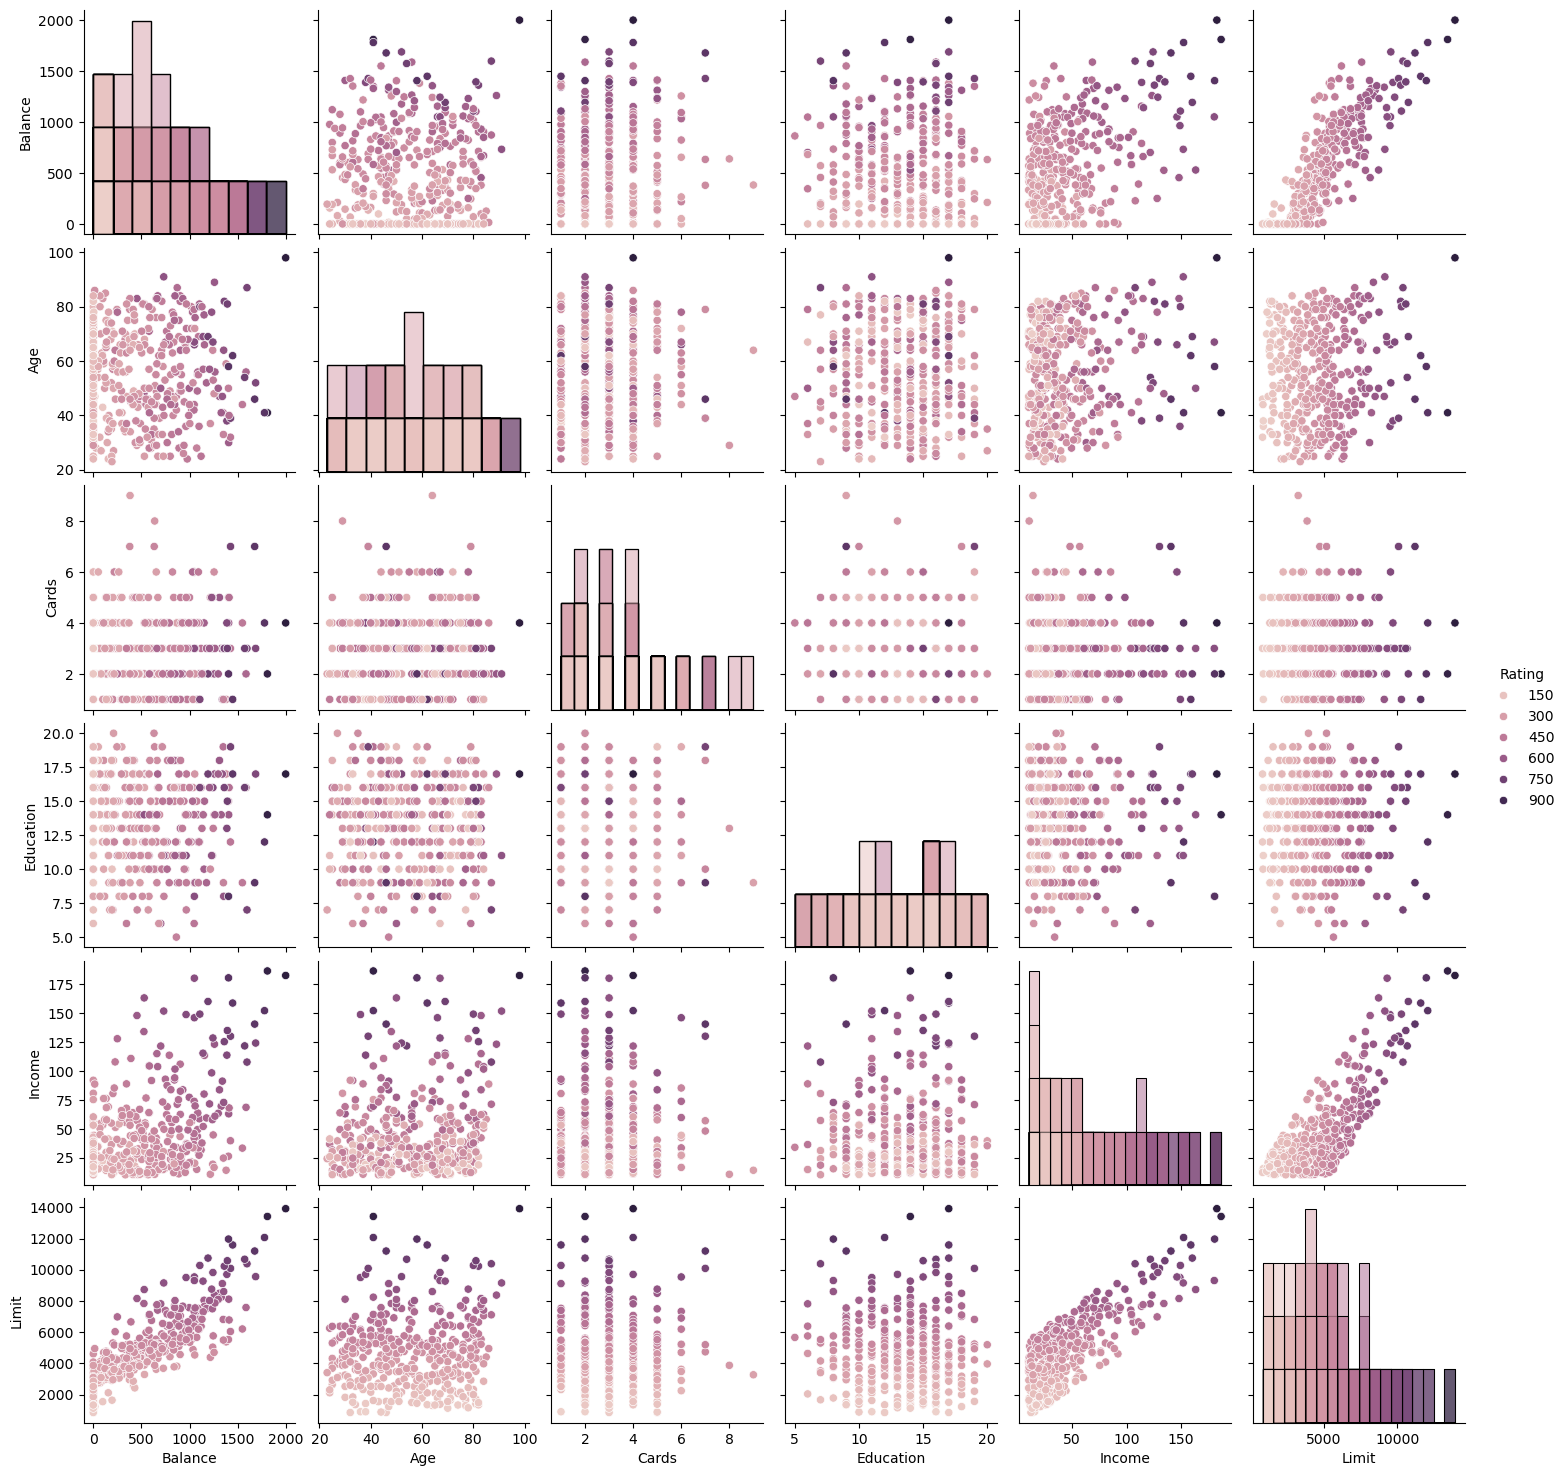

In [13]:
#Pairplot to visualize semantic mapping by using column Cards 
sns.pairplot(credit_df[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']],hue= "Rating", diag_kind="hist")
plt.show()

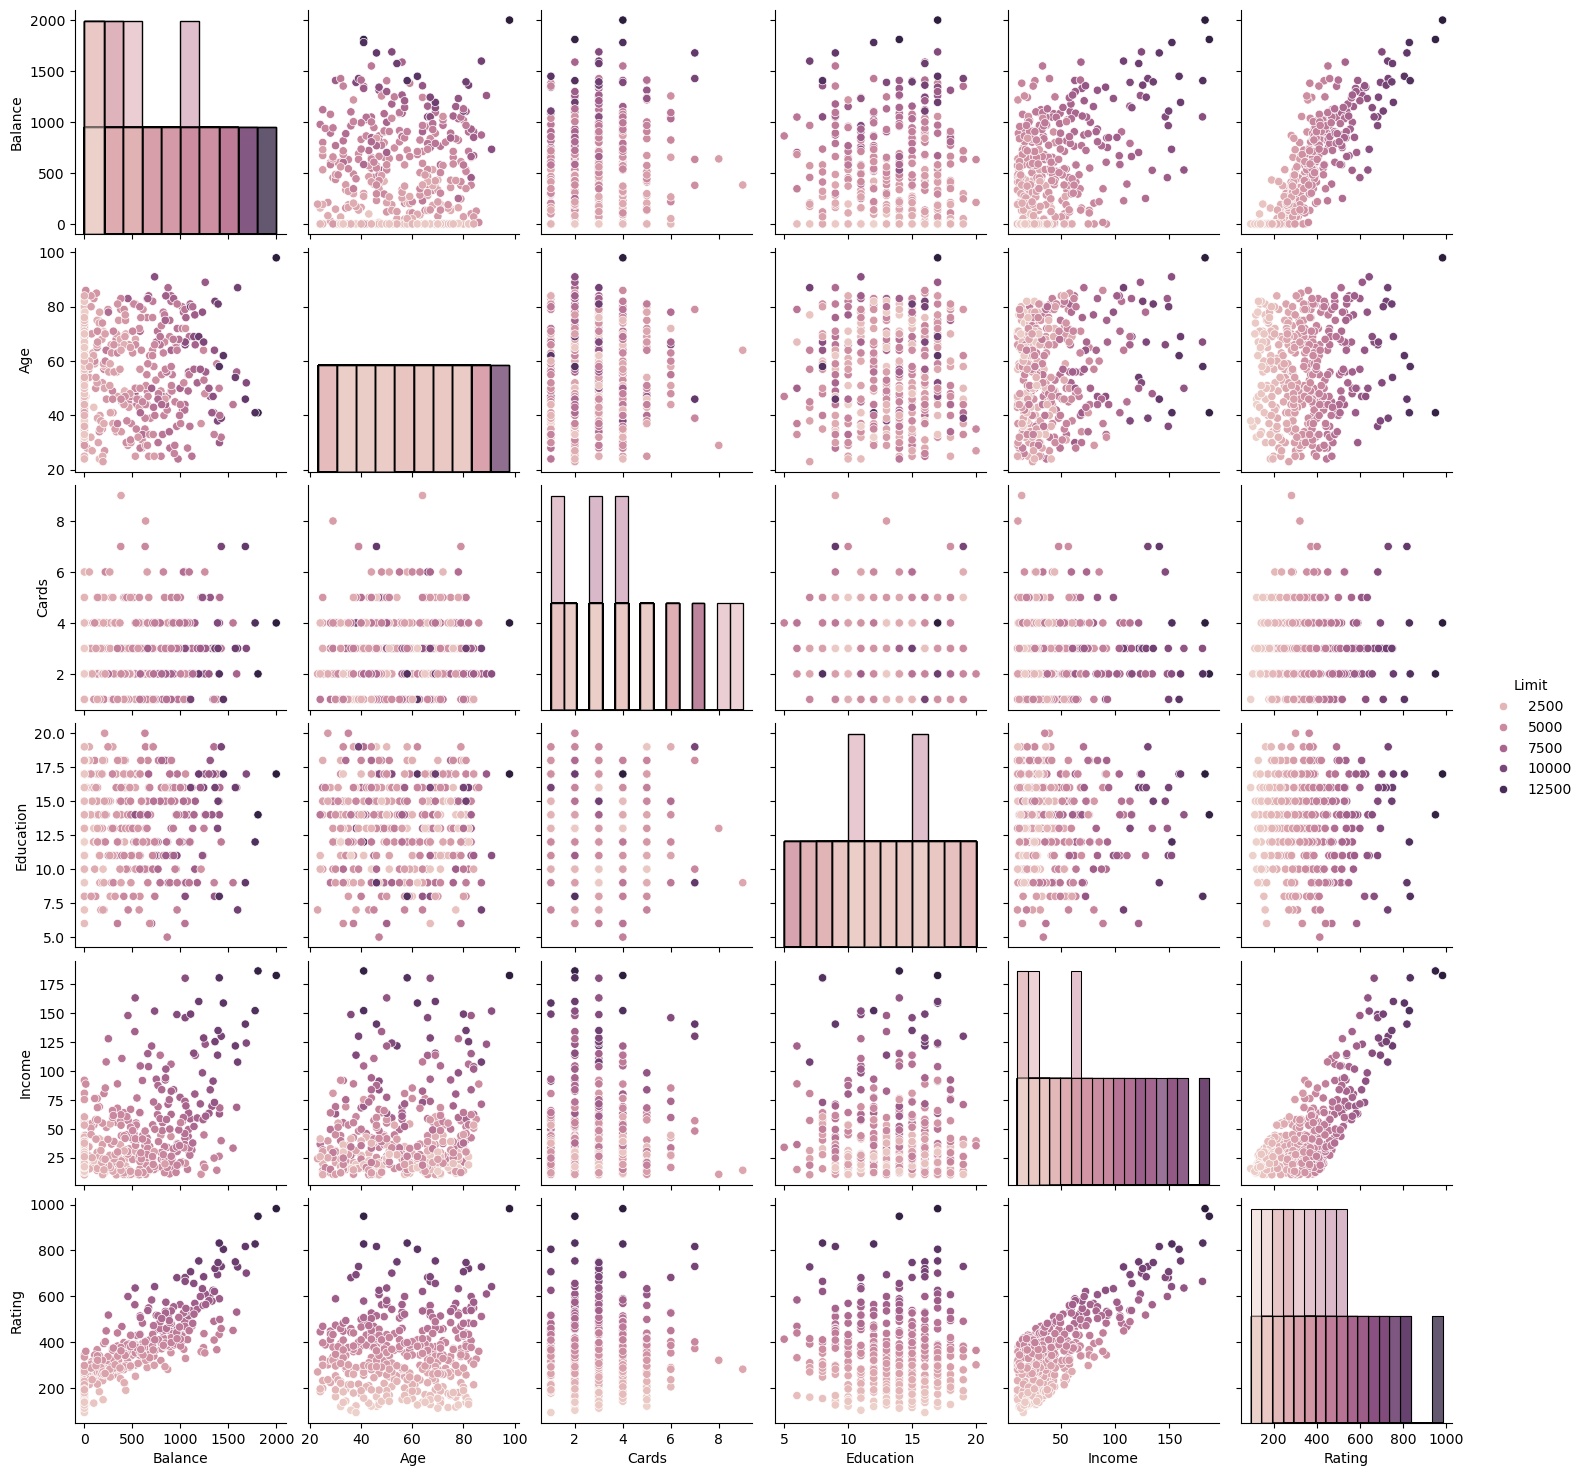

In [14]:
#Pairplot to visualize semantic mapping by using column Cards 
sns.pairplot(credit_df[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']],hue= "Limit", diag_kind="hist")
plt.show()

In [15]:
# Further Analysis with Active Credit users whose Balance is 0 will be copied to active_credit_df
active_credit_df = credit_df[credit_df['Balance'] > 0].copy()

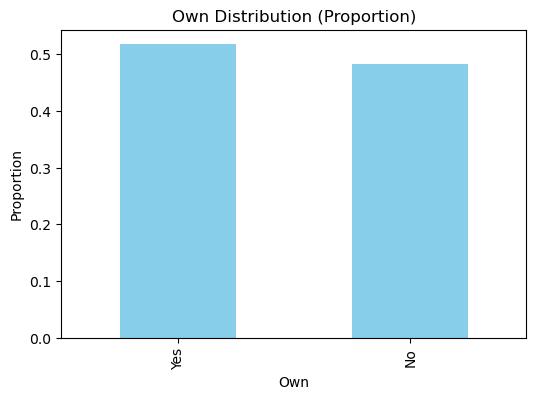

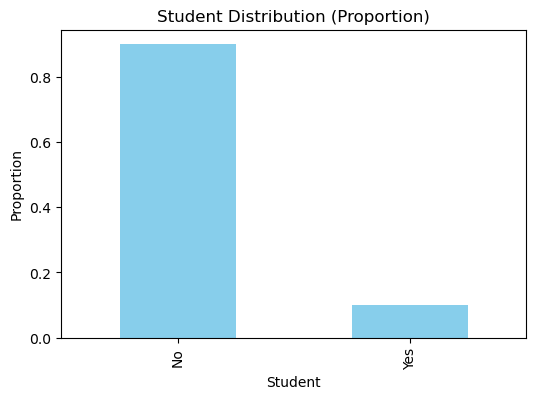

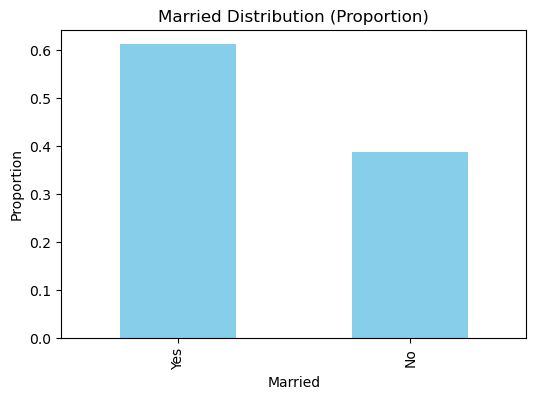

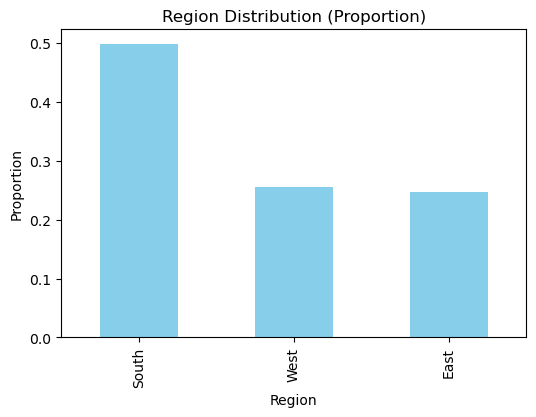

In [16]:
# Proportion plot for categorical features
for col in ['Own', 'Student', 'Married', 'Region']:
    plt.figure(figsize=(6, 4))
    credit_df[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(f'{col} Distribution (Proportion)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.show()

In [17]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Own').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Own')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Region').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Region')

Region
East     Axes(0.555556,0.11;0.344444x0.334783)
South    Axes(0.555556,0.11;0.344444x0.334783)
West     Axes(0.555556,0.11;0.344444x0.334783)
Name: Balance, dtype: object

In [18]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
active_credit_df.groupby('Own').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Own')
active_credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
active_credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
active_credit_df.groupby('Region').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Region')

Region
East     Axes(0.555556,0.11;0.344444x0.334783)
South    Axes(0.555556,0.11;0.344444x0.334783)
West     Axes(0.555556,0.11;0.344444x0.334783)
Name: Balance, dtype: object

In [19]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.25)
credit_df.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], title='Income by Student')
credit_df.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1], title='Rating by Student')
credit_df.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][0], title='Income and Age')
credit_df.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[1][1], color='orange', title='Rating and Age')
credit_df.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating')
credit_df.groupby('Student').Age.plot(kind='kde', ax=axes[2][1], legend=True, title='Age by Student')

Student
No     Axes(0.555556,0.11;0.344444x0.1925)
Yes    Axes(0.555556,0.11;0.344444x0.1925)
Name: Age, dtype: object

As expected, we notice a positive relationship between Income and Rating. This could be explained by the fact that credit Rating is a score assigned to individuals based on their creditworthiness, including the level of personal Income.

Furthermore, as we predicted earlier, Students display lower values of Income compared to non-Students.

Surprisingly, in this dataset, the Income does not Increase with Age, and the Age of Students compared to non-Students does not differ significantly. This observation could lead us to be concerned about the data quality or to seek further attributes of this population to conduct additional investigation. Nonetheless, given the simulated nature of this dataset additional inquiries are not feasible, yet it is worth noting that on a different population, we expect a stronger relationship among Age, Student, and Income.

### Preparing the Data

In [20]:
# Convert categorical columns to category type for analysis
for col in ['Own', 'Student', 'Married', 'Region']:
    credit_df[col] = credit_df[col].astype('category')

In [21]:
# Check for duplicate rows
duplicates = credit_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


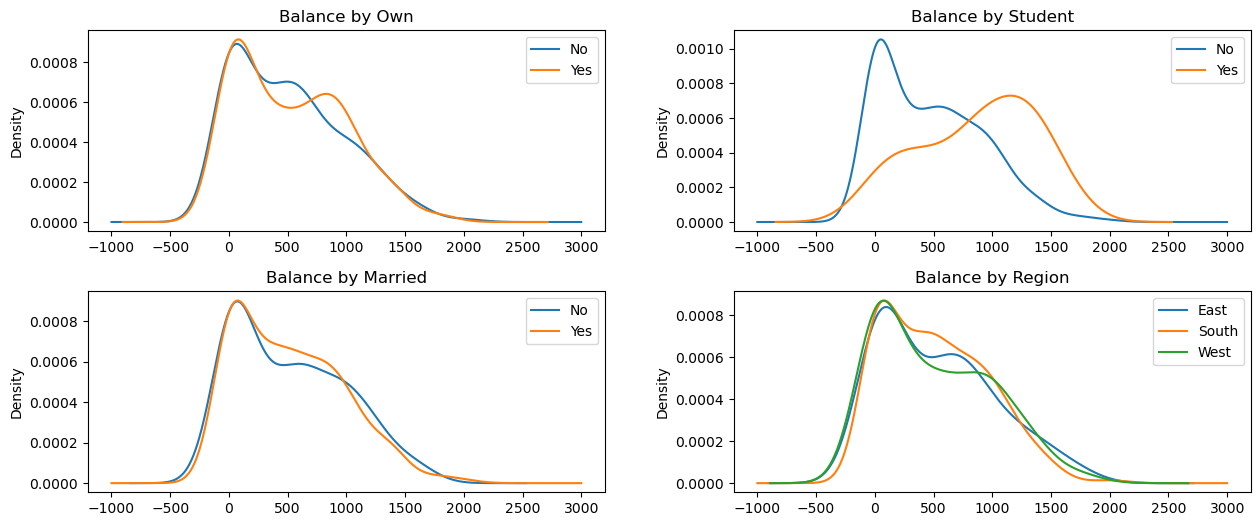

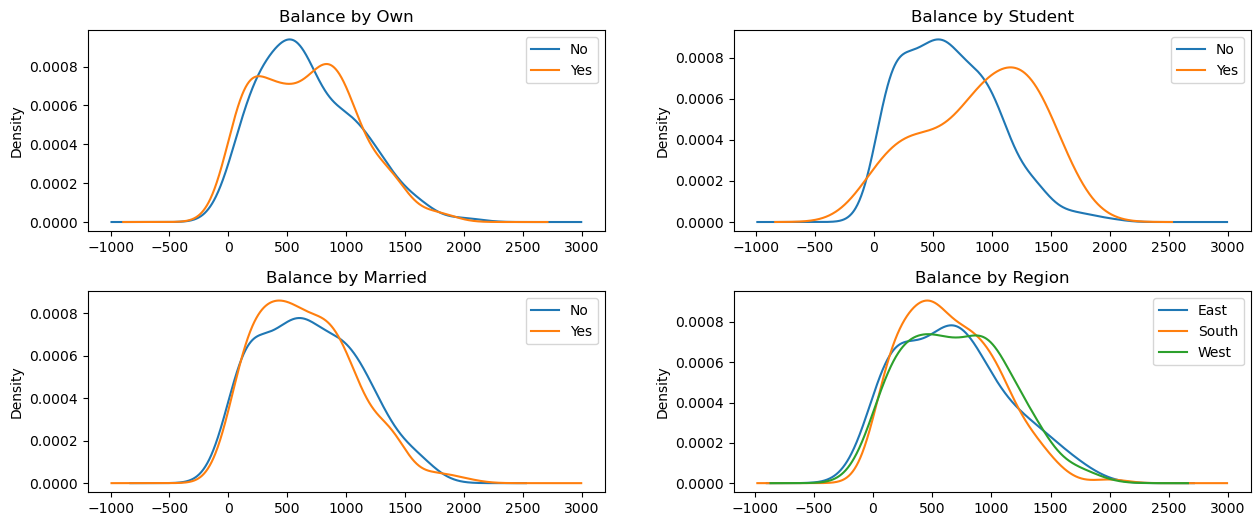

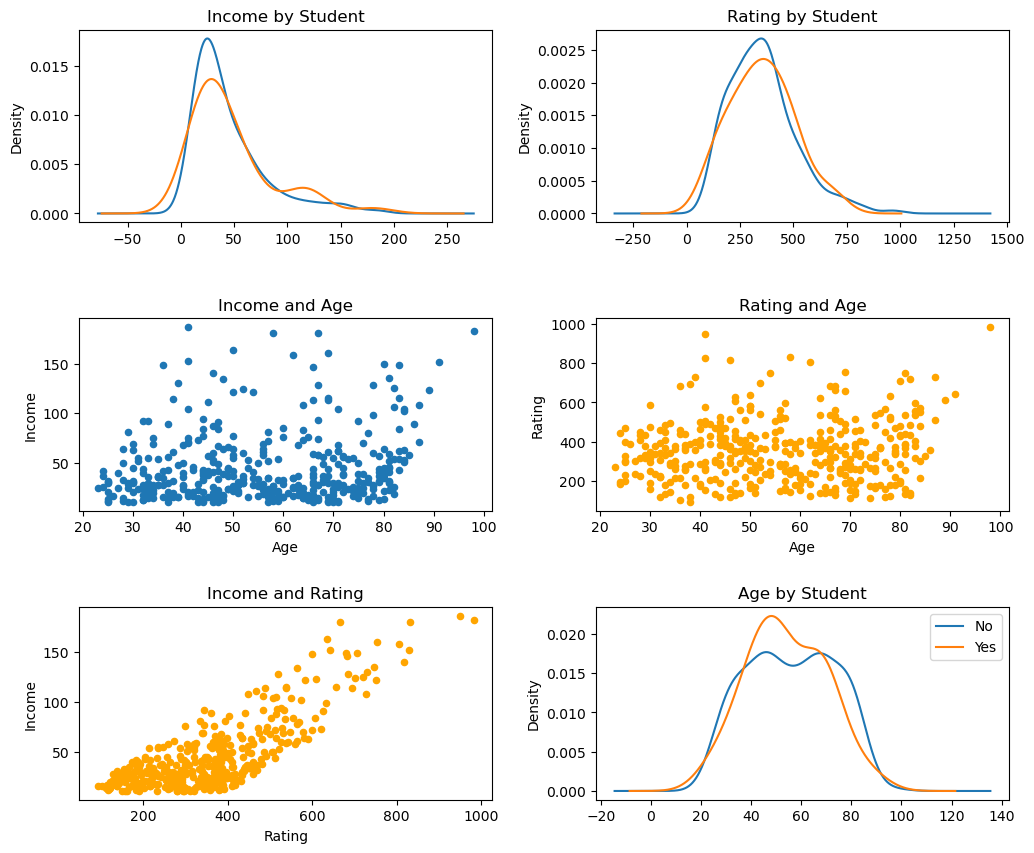

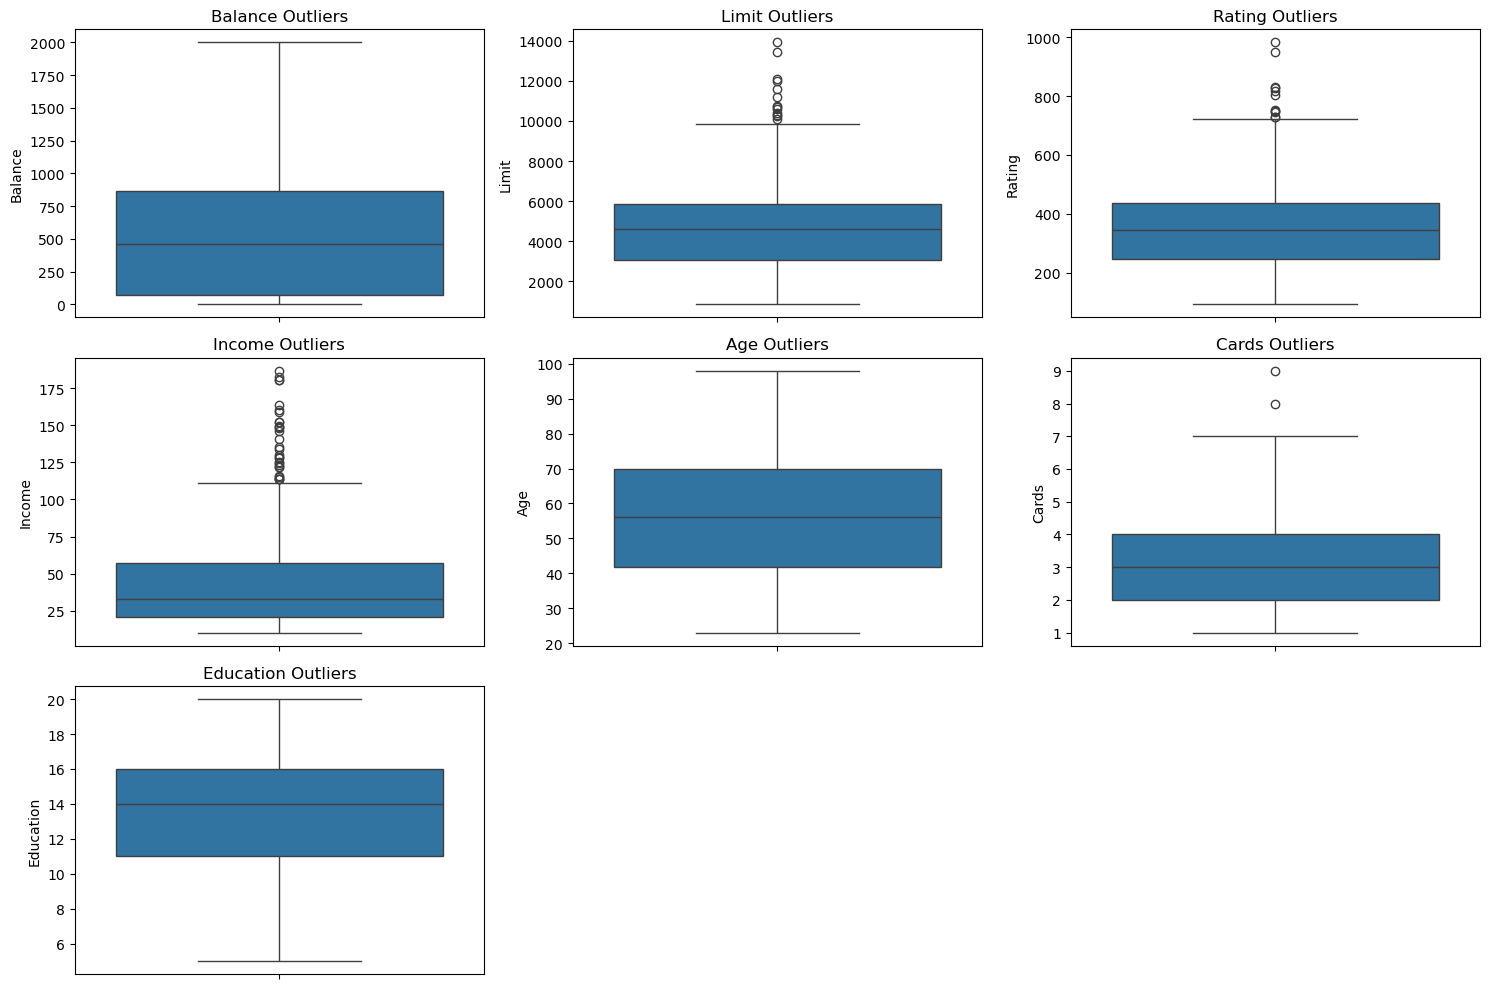

In [22]:
# Boxplot for outliers in numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Balance', 'Limit', 'Rating', 'Income', 'Age', 'Cards', 'Education']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(credit_df[col])
    plt.title(f'{col} Outliers')
plt.tight_layout()
plt.show()

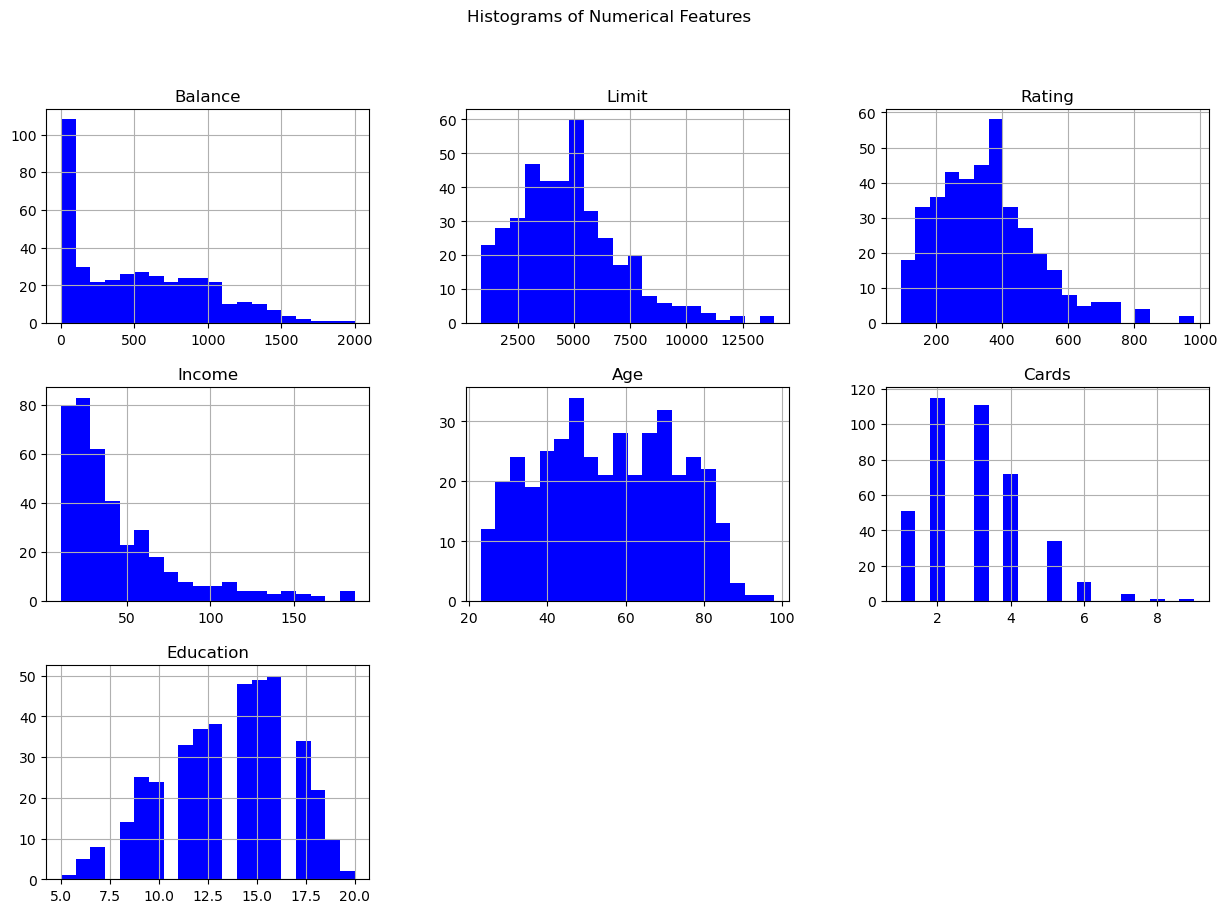

In [23]:
# Histograms for numerical columns
credit_df[['Balance', 'Limit', 'Rating', 'Income', 'Age', 'Cards', 'Education']].hist(bins=20, figsize=(15, 10), color='blue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [24]:
credit_df = pd.get_dummies(credit_df, columns=['Own', 'Student', 'Married', 'Region'], drop_first=True, dtype=int)

In [25]:
print(credit_df.columns)

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_South', 'Region_West'],
      dtype='object')


In [26]:
credit_df

Income  Limit  Rating  Cards  Age  Education  Balance  Own_Yes  \
0     14.891   3606     283      2   34         11      333        0   
1    106.025   6645     483      3   82         15      903        1   
2    104.593   7075     514      4   71         11      580        0   
3    148.924   9504     681      3   36         11      964        1   
4     55.882   4897     357      2   68         16      331        0   
..       ...    ...     ...    ...  ...        ...      ...      ...   
395   12.096   4100     307      3   32         13      560        0   
396   13.364   3838     296      5   65         17      480        0   
397   57.872   4171     321      5   67         12      138        1   
398   37.728   2525     192      1   44         13        0        0   
399   18.701   5524     415      5   64          7      966        1   

     Student_Yes  Married_Yes  Region_South  Region_West  
0              0            1             1            0  
1              1            1             0            1  
2              0            0             0            1  
3              0            0             0            1  
4              0            1             1            0  
..           ...          ...           ...          ...  
395            0            1             1            0  
396            0            0             0            0  
397            0            1             1            0  
398            0            1             1            0  
399            0            0             0            1  

[400 rows x 12 columns]

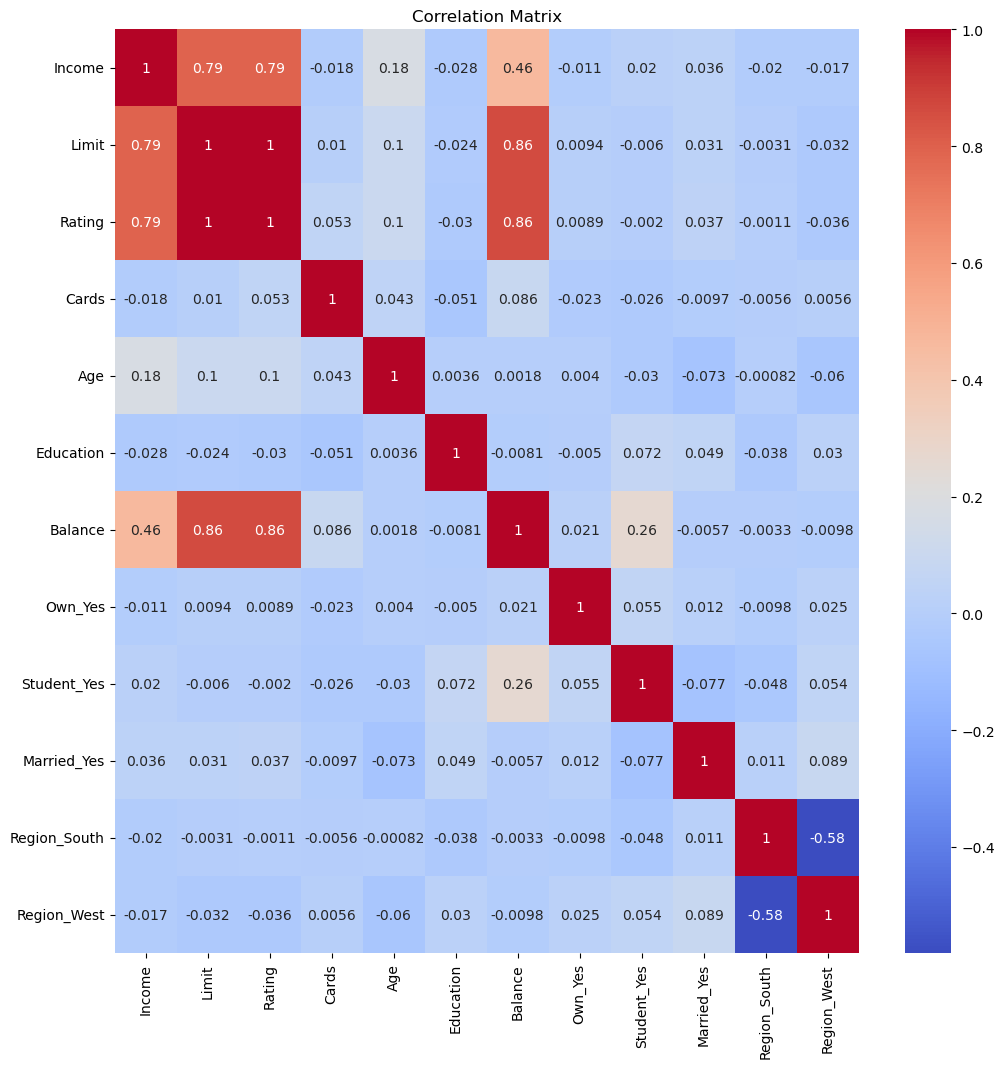

In [27]:
# Correlation matrix with dummy/encoded variables
plt.figure(figsize=(12, 12))
sns.heatmap(credit_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

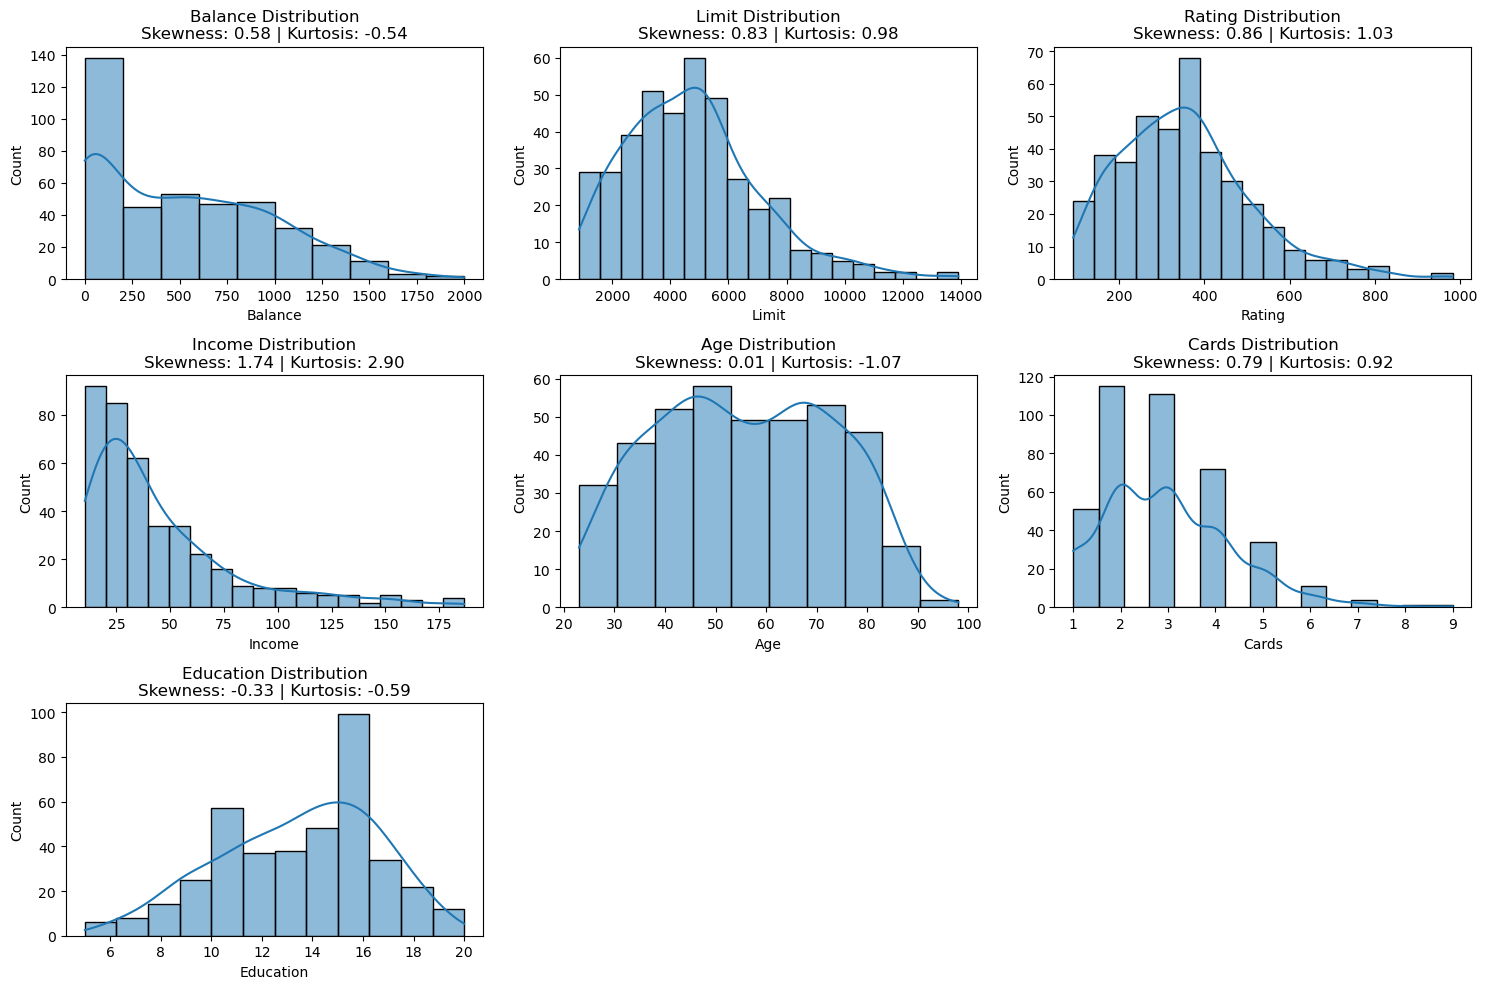

In [28]:
# Distribution plots with skewness and kurtosis
numerical_cols = ['Balance', 'Limit', 'Rating', 'Income', 'Age', 'Cards', 'Education']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(credit_df[col], kde=True)
    plt.title(f'{col} Distribution\nSkewness: {skew(credit_df[col]):.2f} | Kurtosis: {kurtosis(credit_df[col]):.2f}')
plt.tight_layout()
plt.show()

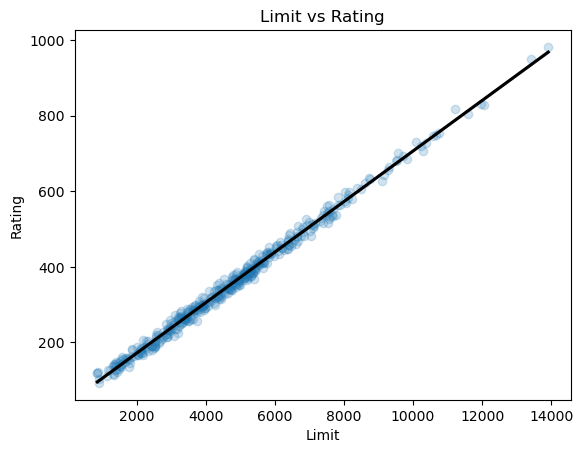

In [29]:
# Simple regression analysis between Limit and Rating
sns.regplot(x='Limit', y='Rating', data=credit_df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'black'})
plt.title('Limit vs Rating')
plt.show()

In [30]:
# Create 'Active' column for customers with Balance > 0
credit_df['Active'] = np.where(credit_df['Balance'] > 0, 'Yes', 'No')

#### Defing the Dependednt and Independent variables for our model

In [31]:
# Define independent variables (features) and dependent variable (target)
X = credit_df.drop(columns=['Balance','Active'])  # Features (all columns except Balance) & Active because this has been use to check balance greater than 0
y = credit_df['Balance']  # Target variable (Balance)

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model building

In [33]:
# Model Building and Evaluation
# Full Model with all predictors except limit(highly correlated with Rating)
full_model = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Own_Yes + Student_Yes + Married_Yes + Region_West + Region_South', data=credit_df).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          4.46e-248
Time:                        04:32:49   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -549.3140     35.085    -15.657   

In [34]:
y_pred1 = full_model .predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred1)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 8183.736377110795
Root Mean Squared Error: 90.46400597536456
Mean Absolute Error: 75.09774734492109


In [36]:
#Calculating VIF to find strong multicollinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = credit_df[['Income', 'Rating','Limit','Cards', 'Age', 'Education', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_West', 'Region_South']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature          VIF
0         Income     7.235677
1         Rating  1282.537578
2          Limit  1083.272005
3          Cards     8.180063
4            Age     9.733285
5      Education    12.017409
6        Own_Yes     2.046208
7    Student_Yes     1.146129
8    Married_Yes     2.666063
9    Region_West     1.969863
10  Region_South     2.839696


#### VIF output interpretation

1. `Income` **(7.24)**: High multicollinearity; might need investigation.
2. `Rating` **(1282.54)**: **`Extremely high multicollinearity`**. Likely redundant or highly correlated with other variables. Action is necessary (e.g., removing or transforming this variable).
4. `Limit` **(1083.27)**: **`Extremely high multicollinearity`**, **similar to Rating**. These two variables might be correlated with each other.
5. `Cards` **(8.18)**: High multicollinearity; may require adjustment.
6. `Age` **(9.73)**: High multicollinearity; investigate further.
7. `Education` **(12.02)**: Very high multicollinearity; likely problematic.
8. `Own_Yes` **(2.05)**: Low multicollinearity; no immediate action needed.
9. `Student_Yes` **(1.15)**: Minimal multicollinearity; safe to keep.
10. `Married_Yes` **(2.67)**: Low multicollinearity; no immediate action needed.
11. `Region_West` **(1.97)**: Low multicollinearity; acceptable.
12. `Region_South` **(2.84)**: Low multicollinearity; no immediate action required.

In [37]:
# Reduced Model with significant predictors after dropping some high multicollinear variables
reduced_model = smf.ols('Balance ~ Income + Rating + Age + Student_Yes', data=credit_df).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          4.17e-256
Time:                        04:32:49   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -547.3047     21.461    -25.503      

The R2 score of reduced model slightly lesser 0.950 compared to 0.951 for full feature model indicating reduced model is also performing well

In [38]:
# Calculating VIF for reduced model features
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_X = credit_df[['Income', 'Limit', 'Cards', 'Age', 'Student_Yes']]
vif_data = pd.DataFrame()
vif_data["feature"] = VIF_X.columns
vif_data["VIF"] = [variance_inflation_factor(VIF_X.values, i) for i in range(VIF_X.shape[1])]

print(vif_data)

       feature        VIF
0       Income   6.973140
1        Limit  11.721704
2        Cards   4.566073
3          Age   6.155307
4  Student_Yes   1.099184


### Analysis of the Updated VIF Values
1. `Income` **(6.97)**: **High multicollinearity.** While improved from the previous list, it’s still above the acceptable range (<5). Consider investigating its relationship with other variables.
2. `Limit` **(11.72)**: **Very high multicollinearity.** This is likely problematic and should be addressed. It may still be highly correlated with other variables like Income.
3. `Cards` **(4.57)**: **Moderate multicollinearity.** This is within a tolerable range but nearing the threshold of concern.
4. `Age` **(6.16)**: **High multicollinearity.** Requires further investigation or potential transformation.
5. `Student_Yes` **(1.10)**: **`Minimal multicollinearity.`** This variable is safe to keep.

Improving the Model

#### Performing LassoCV 

In [39]:
# For further analysis for selecting the variables and regularization we will lasso model
from sklearn.linear_model import Lasso

In [40]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with a range of alpha values
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1,10 ,100], cv=5, max_iter=10000)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = lasso_cv.alpha_

print(f"Optimal alpha value: {optimal_alpha}")

Optimal alpha value: 0.1


##### The optimal alpha value of 0.01 indicates a well-tuned model with `minimal overfitting`. You can now focus on interpreting the results and improving the model further by validating on test data or exploring other regularization techniques like Ridge regression for comparison.

In [41]:
lasso = Lasso(alpha = 0.01, max_iter=10000)
model_lasso=lasso.fit(X_train,y_train)

In [42]:
coefficients = lasso.coef_
selected_features = X.columns[coefficients !=0]
print("Selected Features:",selected_features.tolist())

Selected Features: ['Income', 'Rating', 'Limit', 'Cards', 'Age', 'Education', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_West', 'Region_South']


In [43]:
y_pred2 = model_lasso.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)
r_squared = r2_score(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R square: {r_squared}")

Mean Squared Error: 9022.283778823768
Root Mean Squared Error: 94.98570302326434
Mean Absolute Error: 79.55606006192524
R square: 0.9512957716291983


In [45]:
# Model for active credit data with significant predictors
active_credit_model = smf.ols('Balance ~ Limit + Rating + Income + Age + Student + Cards', data=active_credit_df).fit()
print(active_credit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.031e+04
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:32:50   Log-Likelihood:                -1164.6
No. Observations:                 310   AIC:                             2343.
Df Residuals:                     303   BIC:                             2369.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -698.5009      3.294   -212.

## `Comparison of Lasso CV vs. Reduced OLS Model (active_credit_df) Outputs`
1. **Performance Metrics**
- **Mean Squared Error (MSE)**:	**8870.59**	
- **Root Mean Squared Error (RMSE)**:	**94.18**	
- **Mean Absolute Error (MAE)**:	**79.88**	
- **R² (R-Square)**:	**0.952**
- **R² (R-Square) of `OLS Model`: 0.999**
- **R² (Explained Variance)**: `OLS` has an exceptionally high **R²** of **`0.999`**, indicating that it explains nearly all the variance in the target variable. **`Lasso`** - **CV has a slightly lower R² (0.952)**, but it still explains most of the variance.
  
**Errors:**
`Lasso CV` has a slightly higher error **`(MSE: 8870.59, RMSE: 94.18)`** compared to the implied near-zero errors of OLS.
`This reflects a trade-off:` Lasso introduces bias to reduce overfitting.

2. **Model Comparison**

- **Lasso CV:**
  Shrinks coefficients, potentially setting some to zero.
Reduces multicollinearity and the risk of overfitting.
Results in a simpler, more interpretable model with minimal loss of accuracy.
Performance metrics (e.g., RMSE, R²) suggest it’s robust, even with some feature coefficients penalized.

- **OLS:**
  Performs better in terms of R² and error, likely because it fits the training data almost perfectly.
However, the model is sensitive to multicollinearity, as evidenced by high Variance Inflation Factors (VIF) in your earlier analysis.
Overfitting risk: The high R² may not generalize well to unseen data.

#### **Interpretation of Reduced Model Summary:**

1. **`Overall Model Fit:`**
   
- **R-squared:** 0.999 (99.9% variation in Balance explained).
- **Adjusted R-squared:** 0.999 (robust model with minimal unnecessary predictors).
- **Statistical Significance:**

3. -**`F-statistic:`** 80,310, p-value = 0.00 (highly significant).
   
4. **`Coefficients:`**
- **Intercept:** -698.5 (Balance when predictors are zero).
- **Student_Yes:** +501.042 (students have 501 units higher Balance).
- **Limit:** +0.3365 (positive relationship with Balance).
- **Rating:** -0.1501 (slightly negative effect on Balance).
- **Income:** -9.9930 (higher income reduces Balance).
- **Age:** -1.000 (slight decrease in Balance with age).
- **Cards:** +25.5015 (more cards increase Balance).

5. **`Residual Diagnostics:`**

- **Durbin-Watson:** 2.067 (no autocorrelation in residuals).
- **Omnibus/Jarque-Bera p-values:** > 0.05 (normality of residuals).
- **Condition Number:** 3.27e+04 (possible multicollinearity).

In [46]:
sns.regplot(x='Limit',
          y='Balance',
          data=credit_df,
          line_kws={'color':'black'},
          lowess=True)

<Axes: xlabel='Limit', ylabel='Balance'>

In [47]:
reduced_model = smf.ols('Balance ~ Rating', data = credit_df).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          1.90e-120
Time:                        04:32:50   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
reduced_model = smf.ols('Balance ~ Limit', data = credit_df).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          2.53e-119
Time:                        04:32:50   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.676
Skew:                           0.418   Prob(JB):                     4.87e-08
Kurtosis:                       4.150   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### For the entire dataset, the best model predicted 95% of the variance, while the model fit on the active-only population predicted 99%. The difference suggests that there are other factors influencing non-active cardholders which are not present in our data, or their spending behaviour is reflected on other lending platforms.

In [49]:
# Define independent variables (features) as selected by Lasso model and dependent variable (target)
X2 = credit_df[['Income', 'Rating', 'Cards', 'Age', 'Education', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_West', 'Region_South']]# Features (all columns except Balance) & Active because this has been use to check balance greater than 0
y2 = credit_df['Balance']  # Target variable (Balance)

In [50]:
# Train-Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [51]:
# Model Training using Linear Regression
linear_model = LinearRegression()
linear_model.fit(X2_train, y2_train)

LinearRegression()

In [52]:
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [-7.58207364e+00  3.92284308e+00  5.30032293e+00 -5.36182465e-01
  2.75254200e-01 -1.96393962e+01  4.11651762e+02 -9.18539176e+00
  2.38186260e+01  2.04099062e+01]
Intercept: -554.9991615775017


In [53]:
predictions = linear_model.predict(X2_train)
print(predictions)

[ 990.7744508   463.17948524  476.15631355 1186.63456482  -34.24438448
   37.75217873  425.8699438   447.27373815  -98.76855534 -115.49479311
  802.26822727  645.54753834  -19.10959713  412.00963138 -194.76417535
 -112.59469654 1052.74465147  587.75537799  330.85959368   35.03911674
  723.81908421 1454.35207293  374.55830978 -141.72135977  731.17591923
  -23.87179178  564.83266023   96.3379342   703.01768346  633.41026368
  276.2495275   279.1901016   705.72645237  642.62466012 1297.35836876
  364.36891447 1032.96216406  268.3886949  1104.81033718  -91.35865047
  905.00739058  306.37444224 -144.94251349   81.98802887  479.93146532
 1094.60116069 -208.81260485  106.0172335  -145.95489763  234.03504839
  206.61309361 1057.49811517 -226.72656489 1189.98487831  778.95795017
 1309.53468902  248.21350755  167.14253073  838.10358708  514.61645456
  997.50552063  221.36283963  821.29468921  747.64689883  819.82992456
 -129.96554735  490.70760335  585.90092136  247.8438335   772.24832566
  -16.

In [54]:
# Predicting on Test Data
y_pred3 = linear_model.predict(X2_test)

In [55]:
print(y_pred3)

[ 747.40380402  499.82060285 -138.23261184  184.4103758   843.18293188
   32.61935135  781.15868349   94.17253135  154.78753196 1353.68733716
 1214.30134835  446.90897912  466.05431969  643.73310616  854.38581621
  460.89429839  469.6161745   769.93522159  757.52307055  799.23606974
  276.26473631   37.8957709   733.05618251  457.93878089  448.88352488
  501.16463452  395.11157664  948.27009059  490.95909819  753.55020608
  571.14685093 1334.42815463 1074.86900439  288.16485558  740.75092674
 -104.23271948  782.77498413  354.23443458  680.91562644  650.0071306
  904.76228568 -224.82729321  602.76184356  605.69259798  620.53518748
 1283.37152041   51.27747432  560.56598479  104.90497729  640.89035756
 1159.23899217  172.48621371  615.71578144  499.26987951  637.38492305
  388.23764233  593.06988159  233.38624602  795.22997839  276.54503801
  -41.86669719  -59.30785288  188.60107296  425.90952581  449.24020348
   71.84816261  624.96981311 -194.05108742  698.19066037  618.15379026
  195.9

### Evaluating the model

In [56]:
# Evaluation Metrics
mse = mean_squared_error(y2_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

In [57]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 8871.36
Root Mean Squared Error: 94.19
R-squared: 0.95


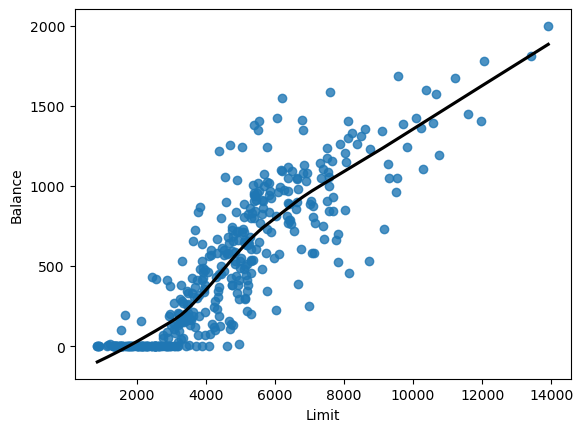

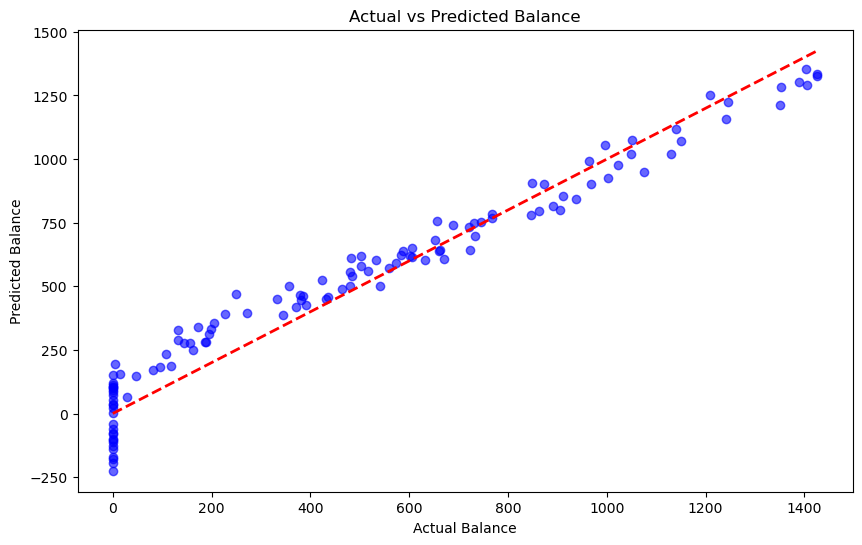

In [58]:
# Plotting Actual vs Predicted Balance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, alpha=0.6, color='b')
plt.plot([y_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Actual vs Predicted Balance')
plt.show()

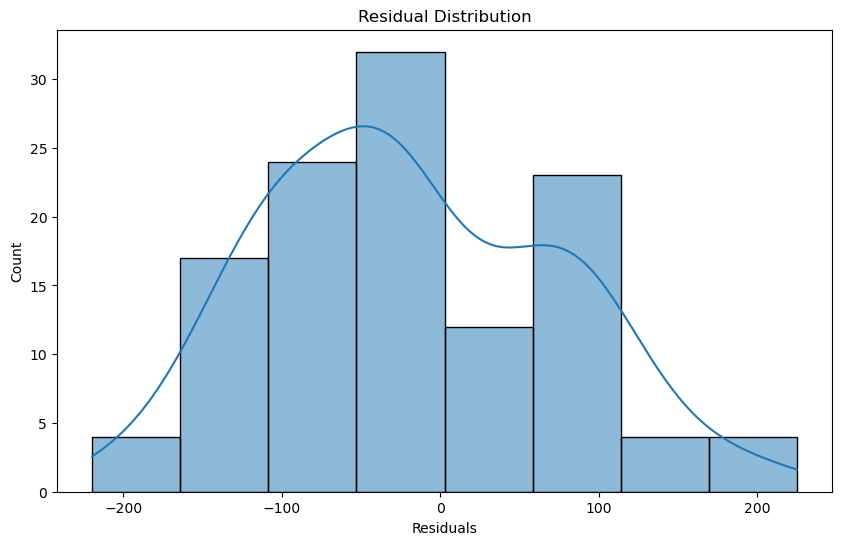

In [59]:
# Diagnostics: Residual Plot
residuals = y2_test - y_pred3
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

In [60]:
# Predicting Credit Card Debt (Balance) for New Customer Data
# Replace new_data with actual new customer data for prediction
# Example: new_data = pd.DataFrame({'Income': [50], 'Rating': [300], 'Cards': [2], ...})
new_data = pd.DataFrame({
    'Income': [50],
    'Rating': [300],
    'Cards': [2],
    'Age': [35],
    'Education': [16],
    'Own_Yes': [1],
    'Student_Yes': [0],
    'Married_Yes': [1],
    'Region_West': [1],
    'Region_South': [0],
})

In [61]:
# Make predictions for new data
predicted_balance = linear_model.predict(new_data)
print(f"Predicted Balance for new customer data: {predicted_balance[0]:.2f}")

Predicted Balance for new customer data: 233.98


In [62]:
active_credit_model.resid

0      -7.647315
1       1.901848
2     -10.910728
3      14.293400
4      10.659333
         ...    
394    -7.954687
395     1.290806
396     2.471296
397    -1.061902
399    -8.677729
Length: 310, dtype: float64

In [63]:
#p-p plot

sm.ProbPlot(active_credit_model.resid, fit = True).ppplot(line='45');

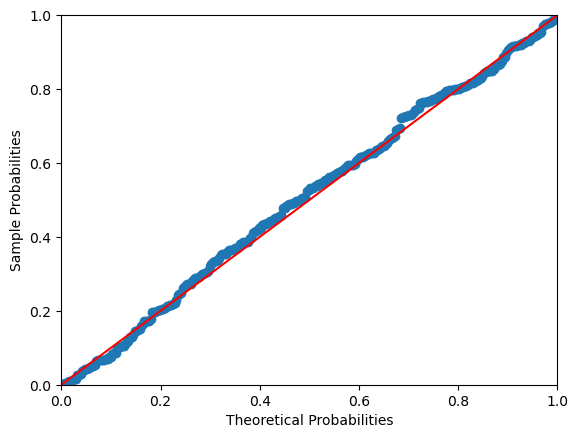

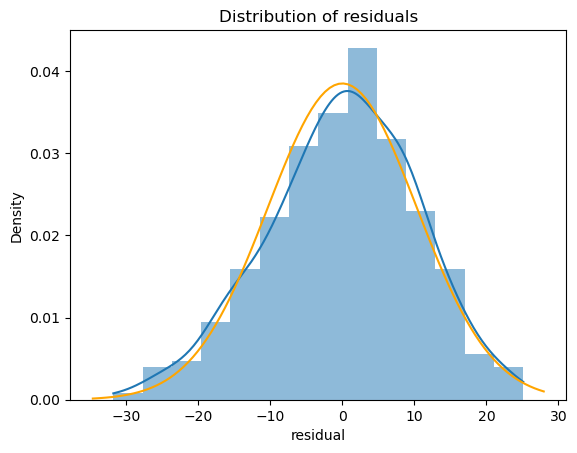

In [64]:
# histogram of the residuals with comparision of the distribution with standard normal distribution

from scipy import stats
mu, std = stats.norm.fit(active_credit_model.resid)

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=active_credit_model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

### Homoscedasticity

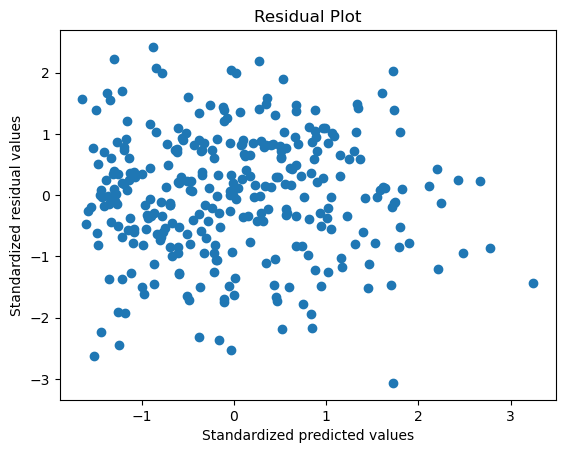

In [65]:
# Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")
    plt.show()

plot_resid_fitted( active_credit_model.fittedvalues,active_credit_model.resid,"Residual Plot")

### Detecting Influencers

In [66]:
k = X2_train.shape[1]
n = X2_train.shape[0]

In [67]:
print("Number of variables:", k, " and number of observations:", n)

Number of variables: 10  and number of observations: 280


In [68]:
leverage_cutoff = 3*(( k+1 )/n)
print("Cutoff for the leverage value: ", round(leverage_cutoff, 3))

Cutoff for the leverage value:  0.118


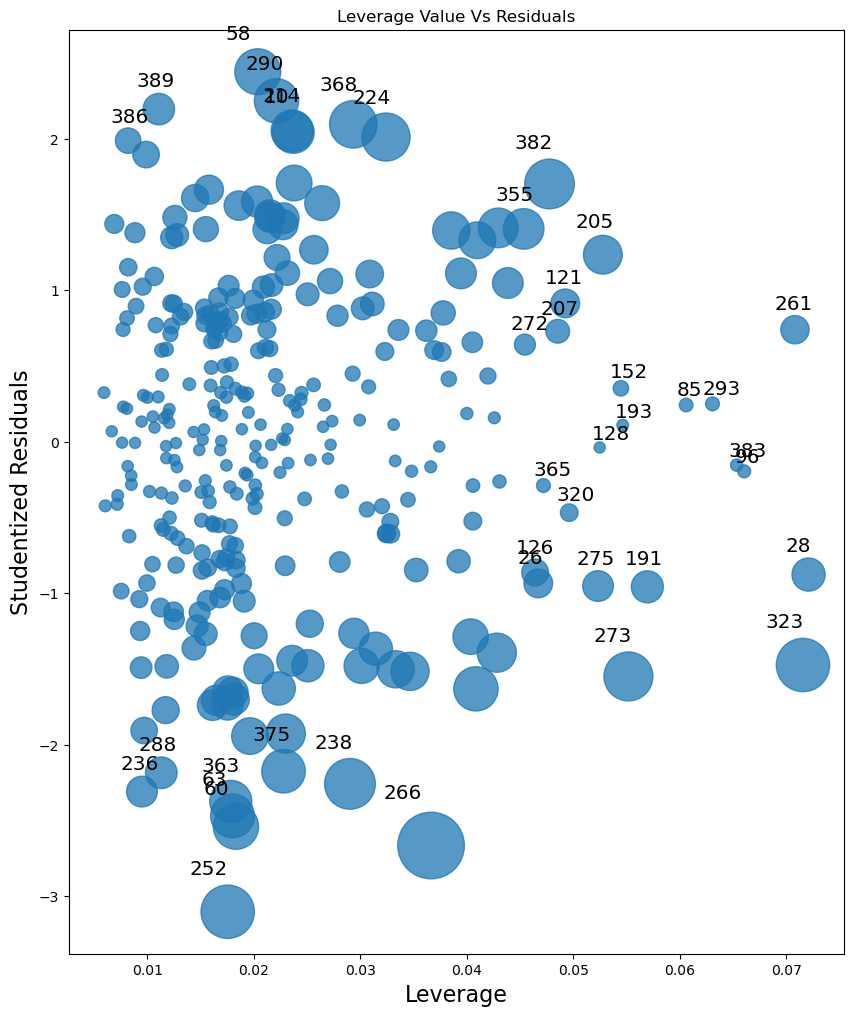

In [69]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (10,12))
influence_plot(active_credit_model, ax = ax)
plt.title("Leverage Value Vs Residuals")
plt.show()

In [70]:
credit_df[credit_df.index.isin([261,28,323,383,96,298])]

Income  Limit  Rating  Cards  Age  Education  Balance  Own_Yes  \
28   186.634  13414     949      2   41         14     1809        1   
96    14.312   5382     367      1   59         17     1380        0   
261  180.379   9310     665      3   67          8     1050        1   
298   20.791   2672     204      1   70         18        0        1   
323  182.728  13913     982      4   98         17     1999        0   
383   14.292   3274     282      9   64          9      382        0   

     Student_Yes  Married_Yes  Region_South  Region_West Active  
28             0            1             0            0    Yes  
96             1            0             0            1    Yes  
261            1            1             0            1    Yes  
298            0            0             0            0     No  
323            0            1             1            0    Yes  
383            0            1             1            0    Yes

In [71]:
# Define indices to drop
indices_to_drop = [261, 28, 323, 383, 96, 298]

# Drop only the indices present in X2_train and y2_train
train_X_new = X2_train.drop(X2_train.index.intersection(indices_to_drop), axis=0)
train_y_new = y2_train.drop(y2_train.index.intersection(indices_to_drop), axis=0)


In [72]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

In [73]:
# Train the model on the refined training data
linear_model.fit(train_X_new, train_y_new)

LinearRegression()

In [74]:
# Output the coefficients and intercept of the model
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [-7.57725807e+00  3.89959685e+00  6.97110830e+00 -5.53098347e-01
 -1.08229606e-01 -1.89821520e+01  4.05151027e+02 -8.22450718e+00
  2.11041034e+01  2.07898436e+01]
Intercept: -546.5877498832881


In [75]:
# Predicting on the new training data
train_predictions = linear_model.predict(train_X_new)
print("Predictions on training data:", train_predictions)

Predictions on training data: [ 981.50401629  463.85871205  473.85951221 1174.32501126  -30.07458015
   39.51341306  424.24322691  445.45748474  -96.67918943 -109.59466152
  801.88065646  640.52159429  -16.79211229  410.0421757  -191.54031488
 -110.64710266 1047.29894836  588.42041855  326.56706899   34.73991302
  721.87430358 1447.21583383  379.16268021 -134.9798235   724.9135667
  -18.02353258  564.25874805   98.28261221  706.04747399  629.88858672
  277.51239542  278.26837824  700.27839551  642.01989354 1294.529304
  364.85938164 1029.75954659  264.5830363  1095.63255882  -89.94681377
  907.39106511  306.07628467 -141.93067965   81.25556173  476.61803834
 1092.01516142 -201.91099815  111.2976782  -141.64538734  234.05791813
  210.59927076 1056.13337852 -221.97979552  779.21977585 1300.62016248
  251.09722027  173.9510642   835.20011557  519.51917241  996.04276248
  225.00096025  815.89484037  746.06396544  819.49909024 -124.04822784
  481.5360535   587.34824087  246.02683522  769.11

In [76]:
# Calculate training error (optional)
train_mse = mean_squared_error(train_y_new, train_predictions)
train_r2 = r2_score(train_y_new, train_predictions)
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)

Training MSE: 11019.176556998134
Training R^2: 0.9469216066484233


In [77]:
# Predicting on the Test Data
y_pred4 = linear_model.predict(X2_test)
print("Predictions on test data:", y_pred4)

Predictions on test data: [ 740.82488069  500.20108144 -129.75439023  186.98018913  839.42017966
   37.5248691   776.23252295   96.22778062  156.34876936 1346.31914021
 1203.7910678   442.49283175  468.45314403  636.87920776  855.27799223
  457.50236908  466.40450159  766.18263621  760.19999152  794.74431308
  272.24944445   41.66869945  728.747598    456.8659985   450.67689348
  503.49468772  397.98964     946.56076233  490.10772747  755.77502768
  573.30650007 1332.24450211 1061.90429471  290.62510143  734.75815278
 -101.11069681  780.9786321   361.90967968  676.33239555  647.92237974
  899.36366615 -221.67493784  593.7498815   610.00700834  621.17216188
 1273.93517613   55.25284903  560.32059317  109.56828354  641.88330108
 1147.52995981  174.66293143  611.48329586  502.56231195  636.20540726
  392.43791156  592.48019729  230.21957162  800.17385317  277.47388514
  -39.21662438  -56.22151094  191.32392914  426.00696242  445.5503469
   75.25439873  620.33866293 -187.74132225  700.6294

In [78]:
# Evaluate model performance on test data
test_mse = mean_squared_error(y2_test, y_pred4)
test_r2 = r2_score(y2_test, y_pred4)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Test MSE: 8971.230830141634
Test R^2: 0.9515713664267654


## Reporting Results and Comparation of the Models

### Comparing the old model with the new model

In [79]:
# 1. Old Model: Train on X2_train and y2_train
old_model = LinearRegression()
old_model.fit(X2_train, y2_train)

LinearRegression()

In [80]:
# Predictions and Metrics for Old Model
old_train_predictions = old_model.predict(X2_train)
old_test_predictions = old_model.predict(X2_test)

In [81]:
old_train_mse = mean_squared_error(y2_train, old_train_predictions)
old_train_r2 = r2_score(y2_train, old_train_predictions)

In [82]:
old_test_mse = mean_squared_error(y_test, old_test_predictions)
old_test_r2 = r2_score(y_test, old_test_predictions)

In [83]:
print("Old Model - Training MSE:", old_train_mse)
print("Old Model - Training R^2:", old_train_r2)
print("Old Model - Test MSE:", old_test_mse)
print("Old Model - Test R^2:", old_test_r2)

Old Model - Training MSE: 11077.104263023151
Old Model - Training R^2: 0.9499047498490862
Old Model - Test MSE: 8871.356543104455
Old Model - Test R^2: 0.9521105093093742


In [84]:
# 2. New Model: Train on train_X_new and train_y_new
new_model = LinearRegression()
new_model.fit(train_X_new, train_y_new)

LinearRegression()

In [85]:
# Predictions and Metrics for New Model
new_train_predictions = new_model.predict(train_X_new)
new_test_predictions = new_model.predict(X2_test)

In [86]:
new_train_mse = mean_squared_error(train_y_new, new_train_predictions)
new_train_r2 = r2_score(train_y_new, new_train_predictions)

new_test_mse = mean_squared_error(y2_test, new_test_predictions)
new_test_r2 = r2_score(y2_test, new_test_predictions)

print("New Model - Training MSE:", new_train_mse)
print("New Model - Training R^2:", new_train_r2)
print("New Model - Test MSE:", new_test_mse)
print("New Model - Test R^2:", new_test_r2)

New Model - Training MSE: 11019.176556998134
New Model - Training R^2: 0.9469216066484233
New Model - Test MSE: 8971.230830141634
New Model - Test R^2: 0.9515713664267654


## Interpretation of the result after removing influencers from our model

1. Training Metrics (Old Model vs. New Model)
Old Model - Training MSE: 11077.10
New Model - Training MSE: 11019.17
Old Model - Training R²: 0.9499
New Model - Training R²: 0.9469
Both models perform similarly on the training set, with a slight reduction in MSE in the new model (from 11077 to 11019). The R² value in both cases is very high (0.9499 for the old model and 0.9469 for the new model), indicating that each model explains around 95% of the variance in the training data. The small difference suggests that removing the specific rows didn’t significantly impact the model’s ability to fit the training data.

2. Test Metrics (Old Model vs. New Model)
Old Model - Test MSE: 8871.35
New Model - Test MSE: 8971.23
Old Model - Test R²: 0.9521
New Model - Test R²: 0.9515
On the test data, both models perform similarly as well, with the old model showing slightly better performance in terms of MSE (8871.35 for the old model vs. 8971.23 for the new model) and R² (0.9521 for the old model vs. 0.9515 for the new model). However, these differences are minimal.

3. Interpretation of Results
Generalization: Both models generalize well to the test data, as evidenced by similar MSE and R² scores between the training and test sets. Neither model shows a large gap between training and test performance, suggesting that neither is overfitting.
Impact of Data Refinement: The small changes in performance metrics from the old model to the new model indicate that removing the specified rows didn’t meaningfully improve or worsen the model’s predictive ability.This implies that the removed rows likely had minimal impact on the model's fit. Slightly Better Fit with the Old Model: The old model performs marginally better on the test set in terms of MSE and R². While the differences are small, it suggests that the refined dataset did not improve the model’s predictive performance.

### Conclusion
Since both models have nearly identical metrics, either model would be acceptable in terms of fit and generalization. However, because the old model has slightly better test metrics, you might consider sticking with the original training set unless there’s a reason to exclude the specific rows. Both models appear well-fitted to the data without major signs of overfitting or underfitting.

## END